# Linear Regresion Model: Analysis of house prices


In [63]:
# IMPORT LIBS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### LOAD THE DATASET
we first load the dataset and make the next moves:
- `check null values`: this is really important to know which columns wont give us enough information
- `drop columns with high null-values rate`: if the null value rate is bigger than 5%, we drop the collumn because it wont give us enough information 

In [64]:
# LOAD DATASET
df = pd.read_csv("csv_files/01_original_data.csv")

In [65]:
# SEE PROPORTION OF NULL VALUES FOR EACH COLUMN THAT CONTAINS AT LEAST 1% NULL
null_percent = df.isnull().mean() * 100
null_columns = null_percent[null_percent > 0]
print(null_columns)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [66]:
# DROP COLUMNS WITH MORE THAN 5% NULL RATE
df = df.loc[:, df.isnull().mean() < 0.05]

### CLEAN THE DATASET
we need to take the data and transform it to a cleaner version, the final product must have a full numerical value dataset so that the model can understand it
- `binary values`: yes/no to 1/0
- `one-hot encoding`: nominal values will be replaced by similar binary values by the one-hot encoding method
- `replace remaining nulls with mean`: the remaining nulls we did not erase are going to be replaced by means

In [67]:
# BINARY VALUES
binary_map = {'Y': 1, 'N': 0}
df['CentralAir'] = df['CentralAir'].map(binary_map)
df['PavedDrive'] = df['PavedDrive'].map(binary_map)

In [68]:
# ONE-HOT ENCODING
df = pd.get_dummies(df, drop_first=True)

bool_columns = [col for col in df.columns if df[col].apply(lambda x: str(x) in ['True', 'False']).all()]
for col in bool_columns:
    df[col] = df[col].apply(lambda x: 1 if str(x) == 'True' or x is True else 0)

In [69]:
# REPLACE NULLS WITH MEAN
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in bool_columns]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [70]:
# VERIFY
print(df.head())

   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  SaleType_ConLw  \
0       196.0         706           0  ...               0               0   
1         0.0         978           0  ...               0               0   
2       162.0         486           0  ...               0               0   
3         0.0         216           0  ...               0               0   
4       350.0         655           0  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  

### CORRELATION MATRIX
we now have a load of collumns, lets see which ones are the ones worth keeping
- `100% data`: too much data, unclear conclussions
- `15% data`: very high correlation with price, can give us clear conclussions. 31 collumns remaining

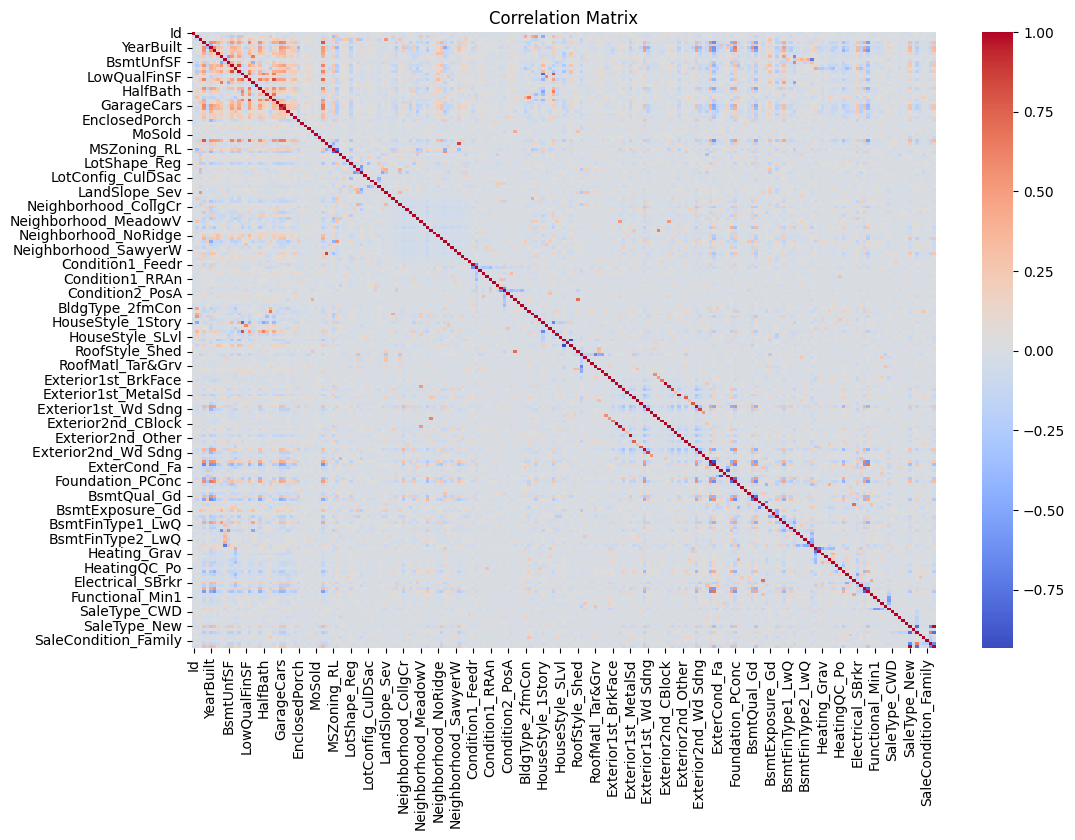

In [71]:
# SEE GENERAL CORRELATION MATRIX
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# too much data, nothing usefull to be seen here

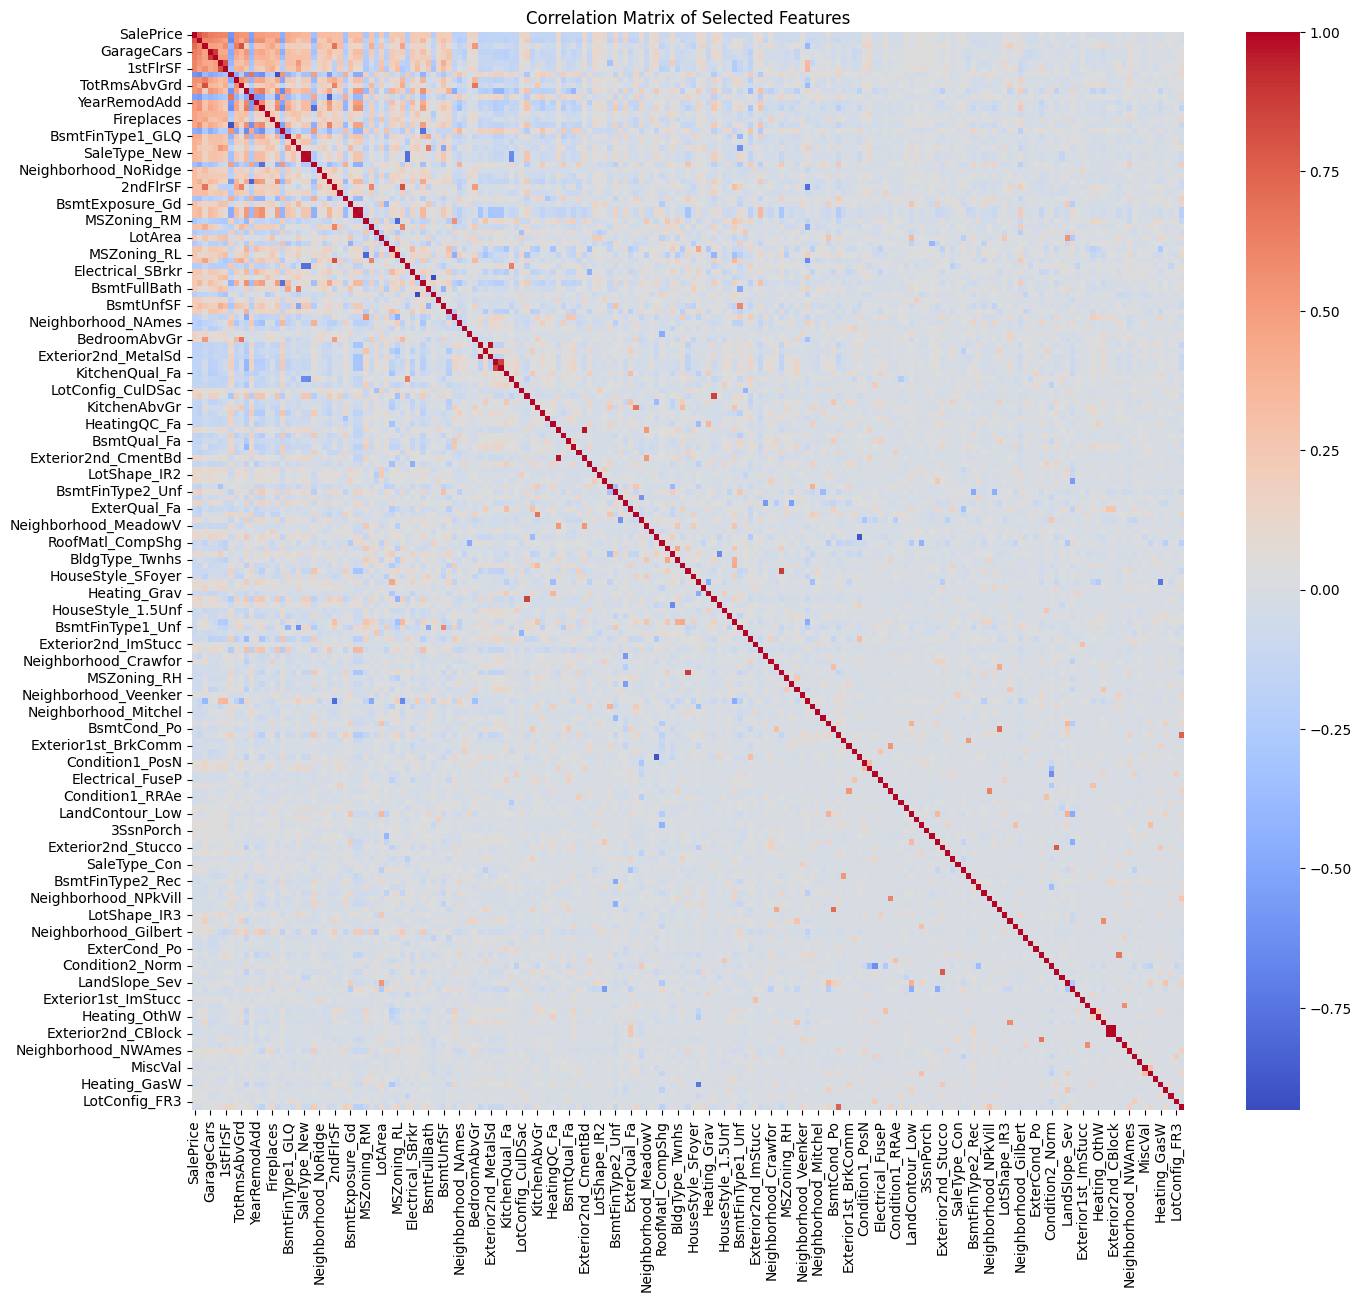

In [ ]:
# TAKE HIGHEST 20% OF VARIABLES WITH HIGHER CORRELATION TO PRICE
corr_target = corr_matrix["SalePrice"].abs().sort_values(ascending=False)
selected_features = corr_target[:int(len(corr_target) * 1)].index.tolist()
df_filtered = df[selected_features]

plt.figure(figsize=(16, 14))
sns.heatmap(df_filtered.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [73]:
# VERIFY
print(df_filtered.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  ExterQual_TA  FullBath  TotRmsAbvGrd  ...  Condition1_RRNn  Id  \
0       856             0         2             8  ...                0   1   
1      1262             1         2             6  ...                0   2   
2       920             0         2             6  ...                0   3   
3       961             1         1             7  ...                0   4   
4      1145             0         2             9  ...                0   5   

   MiscVal  RoofStyle_Shed  Neighborhood_Blueste  Heating_GasW

In [74]:
# EXPORT TO CSV
df_filtered.to_csv("csv_files/02_filtered_data.csv", index=False)